In [4]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [19]:
m =100
X = 6* np.random.rand(m,1) -3
y = 0.5*X**2 + 2*X + np.random.randn(m,1)
import matplotlib.pyplot as plt

In [24]:
# It helps to identify underfitting or overfitting by plotting training and validation errors as the size of training data increase
def plot_learning_curve(model,X,y):
    X_train ,X_val ,y_train ,y_val = train_test_split(X,y,test_size=0.2)
    train_errors , val_errors = [] ,[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict[:m]))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+",linewidth =3, label = "train")
    plt.plot(np.sqrt(val_errors), "b-",linewidth=3,label ="val")
# np.sqrt -- convets MSE to RMES , r-+ === red line with plus markers for traiinig RMSE

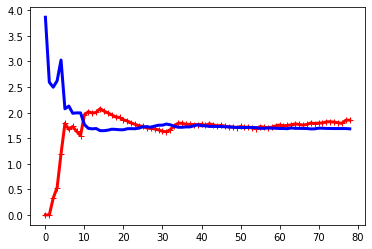

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
plot_learning_curve(lr,X,y)

#### This model is underfitting

In [26]:
# When the model is trained on very few training instances, it is incapable of generalizing 
# properly , which is why the validaion error is initially very high. As the model is shown more 
# traing examples, it learns and thus the validation error slowly goes down. However, once again 
# straight line cannot do a good job modeling the data, so the error ends up at a plateau very close to other curve.


In [27]:
# IF your model is underfitting the trainig data, adding more training examples will not help.
# You need to use more complex model or come up with better features.

## Polynomial regression

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
# Building a more complex model that is polynomial regression
polynominal_regression = Pipeline([
("poly_feature",PolynomialFeatures(degree =4, include_bias = False)),
("lin_reg", LinearRegression())
])



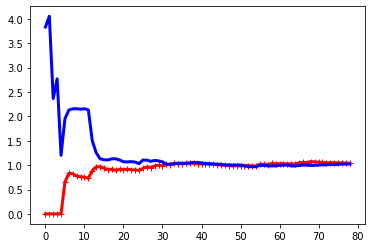

In [45]:
plot_learning_curve(polynominal_regression , X,y)

In [46]:
# If there is a gap between the curves. This means that the model peforms significantly better
# on the training data than on the validation data, which is the hallmark of an overfitting model.
# If you used a much larger training set however the two curves would contiue to get closer

In [47]:
# one way to improve the overfitting is to feed model more training data untill the validation
# error reaches the trainig error
# Now lets talk aboout the model generalization error

## The Bias/Variance Trade off

### Bias :: This part of generalization error is due to wrong assumption, such as assumig that the model is linear when it is not. High bias == Underfit
### Varience  :: model's excessive sensitivity to small variations in the training data. A model with many degree of freedom (high degree polynomial equation) is likey to have high varience

### Increasing the models complexicity increases its varience and reduce the bias, reduicng the models complexicity increase the bias and reduce its varience, THis is know as the 